# HOG
### Histogram of oriented gradient
* https://zhuanlan.zhihu.com/p/85829145
* original:
    * https://learnopencv.com/histogram-of-oriented-gradients/

### 确定interpreter

In [1]:
import os
os.system("which python")

/opt/miniconda3/envs/cv/bin/python


0

### 显示图像

In [2]:
# 省略掉plt.show()这一步。
%matplotlib inline
# 会固定显示一个figure，但是可以动态设置fiure大小等，可以通过关闭fiture来绘制另一个图片
# %matplotlib notebook
import matplotlib as mpl
from matplotlib import pyplot as plt

def show(im_path):

    dpi = mpl.rcParams['figure.dpi']
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [36]:
import cv2
import numpy as np
from skimage import feature, exposure

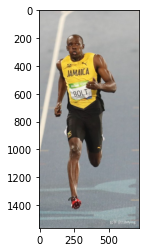

In [37]:
# Read image
img_org = cv2.imread('runner.jpg')
plt.imshow(img_org[:,:,::-1])

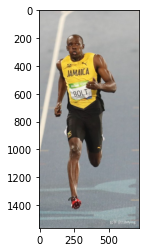

In [38]:
# 归一化
img = np.float32(img_org) / 255.0
plt.imshow(img[:,:,::-1])

In [39]:
# 计算x和y方向的梯度
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

In [40]:
# 计算合梯度的幅值和方向（角度）
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

In [41]:
print(np.sum(gx > 0.5), np.sum(gy > 0.5), np.sum(mag > 0.5), np.sum(angle > 0.5))

96 69 799 2517601


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


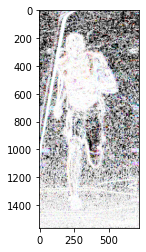

In [42]:
plt.imshow(angle)

### 当前版本的scikit-image是0.19.1 
```bash
(cv) ➜  labs_hog git:(main) ✗ conda list | grep scikit-image
scikit-image              0.19.1                   pypi_0    pypi
```

### multichannel vs channel_axis
https://github.com/scikit-image/scikit-image/issues/4294

In [43]:
fd, hog_image = feature.hog(img_org, 
                            orientations=9, 
                            pixels_per_cell=(16, 16),
                            cells_per_block=(2, 2), 
                            visualize=True, 
                            channel_axis=-1)
#                             multichannel=True)

In [45]:
# Rescale histogram for better display
# rescale_intensity: Return image after stretching or shrinking its intensity(lighting) levels.
# 恢复到原始图片的光影效果
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

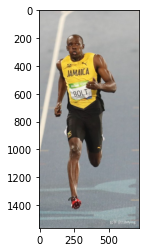

In [46]:
plt.imshow(img_org[:,:,::-1])

In [51]:
np.sum(hog_image_rescaled>0.5)

15139

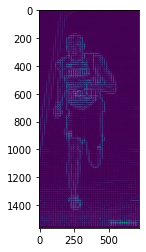

In [54]:
plt.imshow(hog_image_rescaled)